In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文　
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

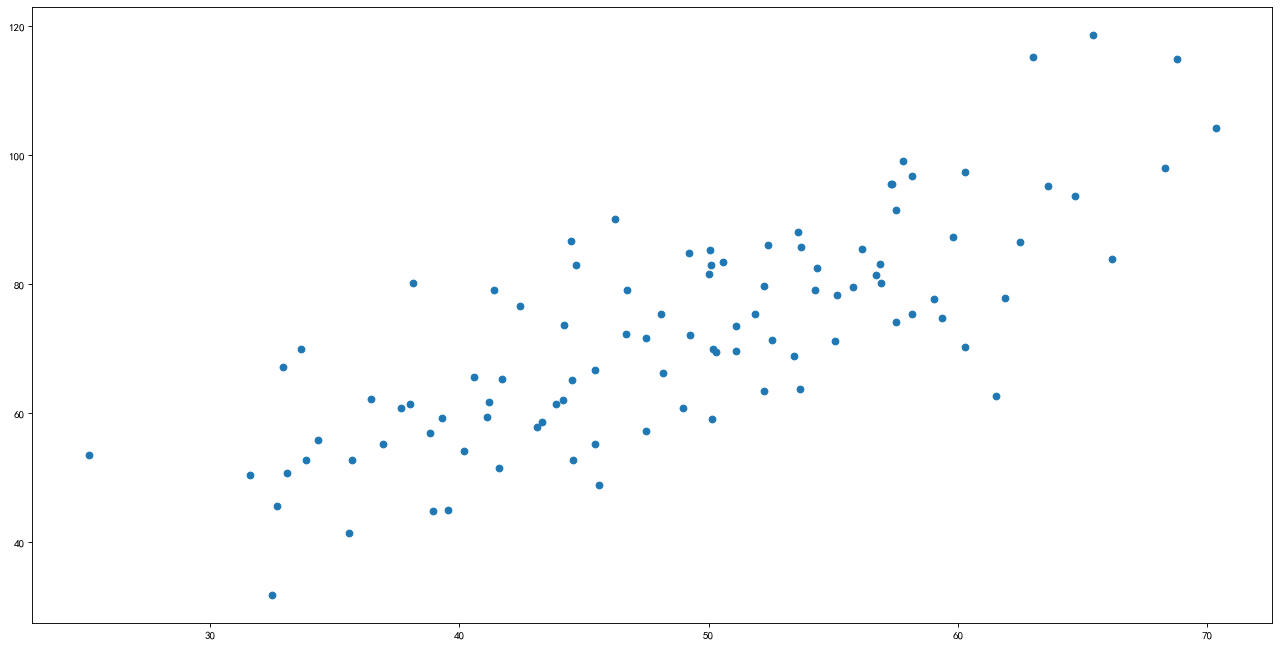

(100,)


In [25]:
# 载入数据
data = np.genfromtxt("data.csv", delimiter=",")
x_data = data[:, 0]  # 得到数据集的x
y_data = data[:, 1]  # 得到数据集的y
#设置图形大小
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x_data, y_data)
plt.show()
print(x_data.shape)  # (100,) 即该数据集样本点有100个

In [26]:
# 规定学习率
learn_rate = 0.0001
# 设定截距
b = 0
#斜率
k = 0
#迭代次数
epochs = 50


# 最小二乘法(得到总代价)
def least_squares(b, k, x_data, y_data):
    totalError = 0
    for i in range(0, len(x_data)):
        totalError += (y_data[i] - (k * x_data[i] + b)) ** 2
    return totalError / float(len(x_data))


# 梯度下降算法
def Gradient_descent(x_data, y_data, b, k, learn_rate, epochs):
    m = float(len(x_data))  # 总样本个数
    for i in range(epochs):  # 最大迭代50次
        b_grad = 0
        k_grad = 0
        for j in range(0, len(x_data)):
            b_grad += (1 / m) * ((k * x_data[j] + b) - y_data[j])  #求导后的算式
            k_grad += (1 / m) * x_data[j] * ((k * x_data[j] + b) - y_data[j])  # 预测值 - 真实值
        #更新k和b(同步更新)
        b = b - (learn_rate * b_grad)
        k = k - (learn_rate * k_grad)
        #进行观测(每迭代5次输出图像查看)
        if i % 5 == 0:
            print("epochs:", i)
            plt.plot(x_data, y_data, 'b.')
            plt.plot(x_data, k * x_data + b, 'r')
            plt.show()

    return b, k

epochs: 0


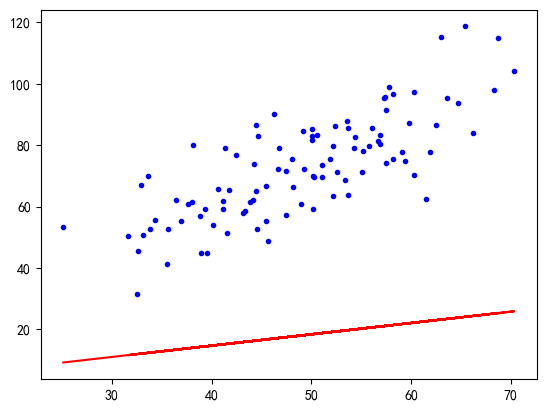

epochs: 5


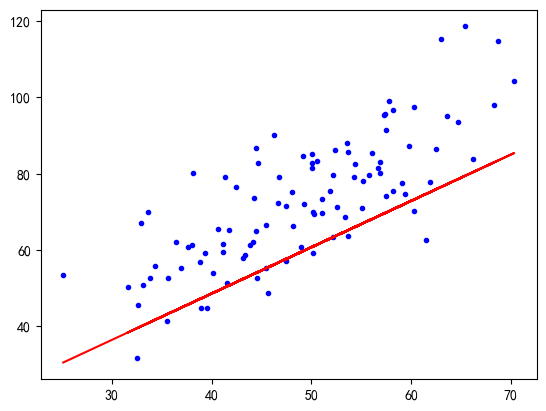

epochs: 10


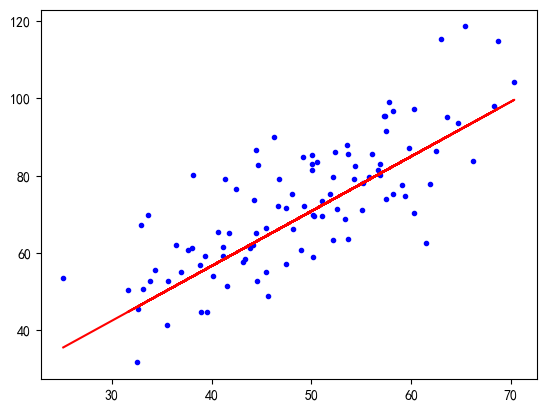

epochs: 15


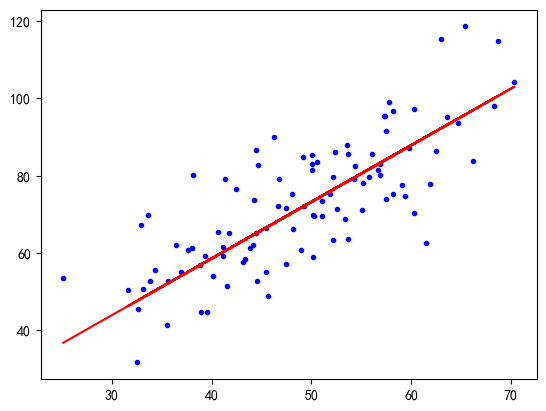

epochs: 20


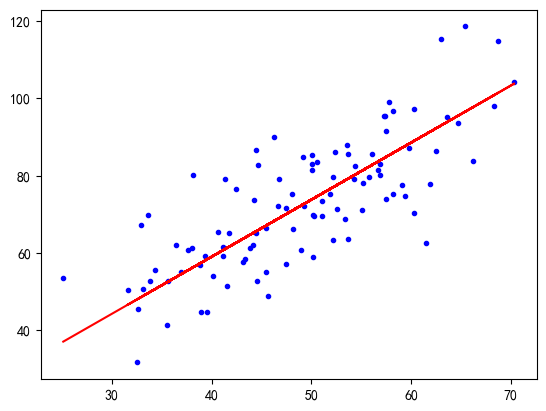

epochs: 25


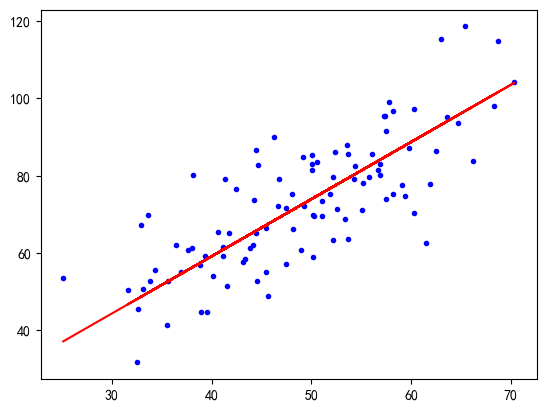

epochs: 30


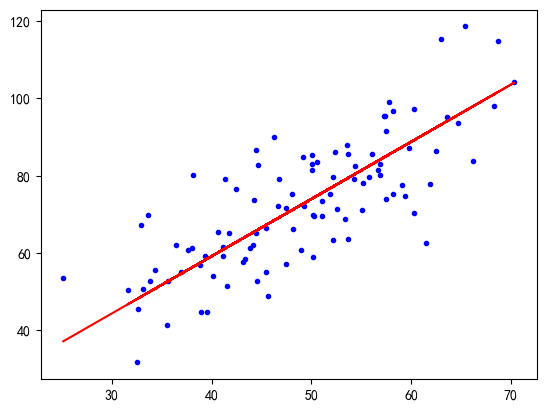

epochs: 35


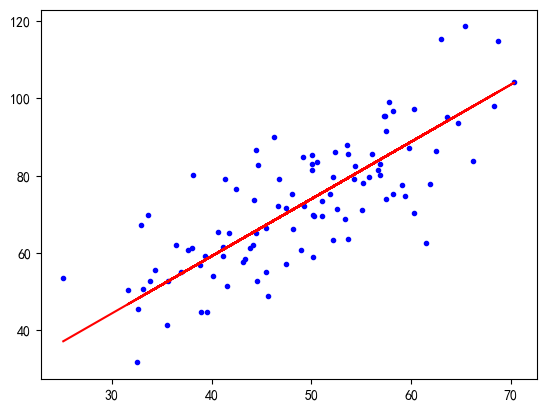

epochs: 40


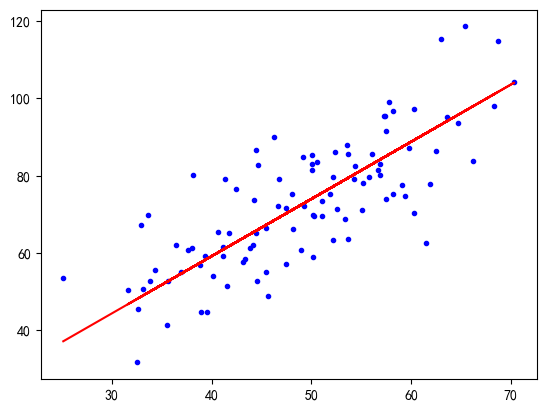

epochs: 45


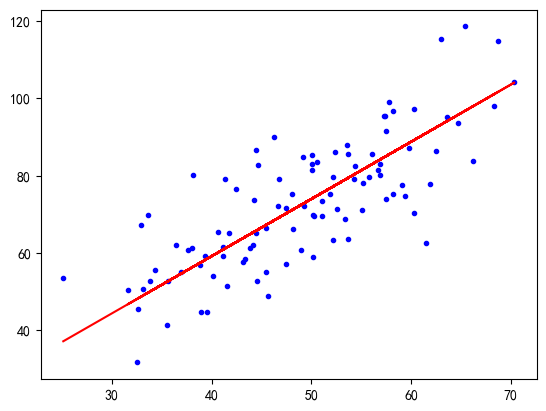

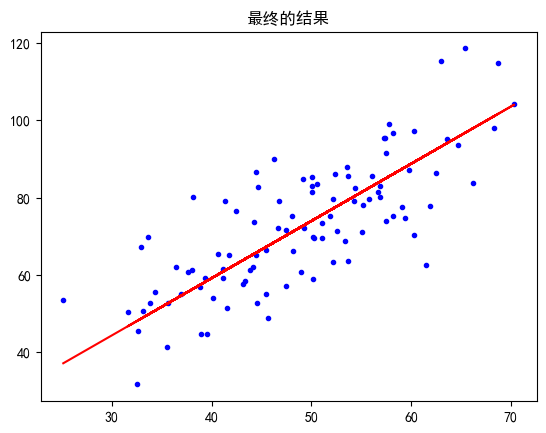

In [27]:
b, k = Gradient_descent(x_data, y_data, b, k, learn_rate, epochs)
#绘制最终的结果
plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, k * x_data + b, 'r')
plt.title("最终的结果")
plt.show()
#根据输出的结果，最终的梯度下降到第20轮已经收敛